# 2HDM-General

## Higgs couplings with fermions
In the most general context to 2HDM, the couplings $g_{hff}$ can be extracted of:

$$\mathcal{L}_Y^{hqq} = \frac{g}{2}\left(\frac{m_{d_{m}}}{m_{W}}\right) d_{m}\left[-\frac{\operatorname{sen} \alpha}{\cos \beta} \delta_{m n}+\frac{\sqrt{2} \cos (\alpha-\beta)}{g \cos \beta}\left(\frac{m_{W}}{m_{d_{m}}}\right)\left(\tilde{Y}_{2}^{d}\right)_{m n}\right] d_{n} h^{0}$$
$$+\frac{g}{2}\left(\frac{m_{u_{m}}}{m_{W}}\right) \bar{u}_{m}\left[\frac{\cos \alpha}{\operatorname{sen} \beta} \delta_{m n}-\frac{\sqrt{2} \cos (\alpha-\beta)}{g \operatorname{sen} \beta}\left(\frac{m_{W}}{m_{u_{m}}}\right)\left(\bar{Y}_{1}^{u}\right)_{m n}\right] u_{n} h^{0}$$

where $f$ represents fermions, $m_f$ and $m_W$ are the masses of $f$ and $W$ respectively, $\alpha$ and $\beta$ are the mixing angles of 2HDM-I and finally $g$ is the $SU(2)$ coupling constant. Y de note Yukawa couplings which can be rewritten using Cheng and Sher anzats, de tal forma que 

$$\left(Y_{1}^{f}\right)_{i j} = \frac{\sqrt{m^f_i m^f_j}}{v}A_{ij}^f$$

In the case of $W$ and $Z$ Higgs couplings we have the next expressions:

$$g_{hVV} = g_V m_{V}\sin{(\beta-\alpha)}$$
where $m_V$ with $V = Z, W$. If we consider $C_{\alpha \beta} = \cos{(\beta-\alpha)}$

$$\alpha = \arctan{(\tan{(\beta)})}- \arccos{(C_{\alpha \beta})}$$
$$\sin{(\beta)} = \tan{(\beta)}\cos{(\arctan{(\tan{(\beta)})})}$$
then, $g_{hff}$ and $g_{hVV}$ are rewritten in term of $t_{\beta} = \tan{(\beta)}$ and $C_{\alpha \beta}$.

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

In [1]:
import sympy as sp #import sympy
sp.init_printing()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from spacemathpy import *

### Python definition of $g_{hff}$

In [2]:
#2HDM-III
def ghtt_2hdm(α,Att,Cab,tb):
    global mW,mt,g,SMvev
    if issymbolic(α,Att,Cab,tb):
        MW,Mt= mW['symbol'],mt['symbol']
        return (g['symbol']/2)*(Mt/MW)*(sp.cos(α)/(tb*sp.cos(sp.atan(tb))) + 
                sp.sqrt(2)*Cab/(g['symbol']*tb*sp.cos(sp.atan(tb)))*(MW/Mt)*(
                    Mt/SMvev['symbol'])*Att)
    else:#(g/2) (mt/mW) ((Cos[a]/(tb*Cos[ArcTan[tb]])) + (Sqrt[2] Cab/(g*tb*Cos[ArcTan[tb]]) (mW/mt)*(mt/vev*Att)))
        MW,Mt= mW['value'],mt['value']
        return (g['value']/2)*(Mt/MW)*((np.cos(α)/(tb*np.cos(np.arctan(tb)))) + 
                (np.sqrt(2)*Cab/(g['value']*tb*np.cos(np.arctan(tb)))*(MW/Mt)*(
                    Mt/SMvev['value'])*Att))

symbolic definition of variables

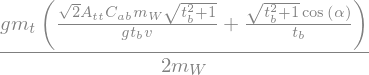

In [3]:
a,Att,cab,tb = sp.symbols('alpha,A_{tt},C_{ab},t_b',
                          real=True)
ghtt_2hdm(a,Att,cab,tb)

numeric evaluation

In [4]:
ghtt_2hdm(0.1,0.2,0.3,0.4)

In [5]:
def ghbb_2hdm(α,Abb,Cab,tb):
    global mW,mb,g,SMvev
    if issymbolic(α,Abb,Cab,tb):
        MW,Mb= mW['symbol'],mb['symbol']
        return (g['symbol']/2)*(Mb/MW)*(-(sp.sin(α)*tb)/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mb)*(Mb/SMvev['symbol'])*Abb)
    else:#(g/2) (mb/mW) (((-Sin[a]*tb)/Sin[ArcTan[tb]]) + (Sqrt[2] (Cab*tb)/(g*Sin[ArcTan[tb]]) (mW/mb)*(mb/vev*Abb)))
        MW,Mb= mW['value'],mb['value']
        return (g['value']/2)*(Mb/MW)*(((-np.sin(α)*tb)/np.sin(np.arctan(tb))) + 
                (np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mb)*(Mb/SMvev['value']*Abb)))

symbolic evaluation

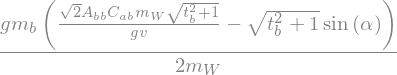

In [6]:
Abb = sp.symbols('A_bb')    
ghbb_2hdm(a,Abb,cab,tb)

numeric evaluation

In [7]:
ghbb_2hdm(0.1,0.2,0.3,0.4)

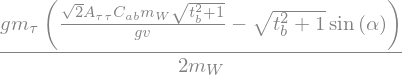

In [8]:
def ghtautau_2hdm(α,Atata,Cab,tb):
    global mW,mta,g,SMvev
    if issymbolic(α,Atata,Cab,tb):
        MW,Mtau= mW['symbol'],mta['symbol']
        return (g['symbol']/2)*(Mtau/MW)*(-(sp.sin(α)*tb)/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['symbol'])*Atata)
    else:#(g/2) (mtau/mW) ((-Sin[a]*tb/Sin[ArcTan[tb]]) + (Sqrt[2] (Cab*tb)/(g*Sin[ArcTan[tb]]) (mW/mtau)*(mtau/vev*Atata)))
        MW,Mtau= mW['value'],mta['value']
        return (g['value']/2)*(Mtau/MW)*((-np.sin(α)*tb/np.sin(np.arctan(tb))) + 
                (np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mtau)*(Mtau/SMvev['value']*Atata)))

Atata = sp.symbols(r'A_{\tau\tau}')    
display(ghtautau_2hdm(a,Atata,cab,tb))
ghtautau_2hdm(0.1,0.2,0.3,0.4)

## Higgs couplings with vector bosons
In the case of $g_{hWW}$ and $g_{hZZ}$ the couplings in the $2HDM$ are given by

$$\mathcal{L}_{hVV} = g m_{V} \sin{(\alpha - \beta)}$$ 

where $V = W,Z$. The corresponding functions in python are given as follow

In [9]:
def ghww_2hdm(sab):
    global mW,g
    if issymbolic(sab):
        MW,ggw= mW['symbol'],gw['symbol']
    else:
        MW,ggw= mW['value'],gw['value']
    return ggw*MW*sab
     
        
def ghzz_2hdm(sab):
    global mZ,g
    if issymbolic(sab):
        MZ,ggz= mZ['symbol'],gz['symbol']
    else:
        MZ,ggz= mZ['value'],gz['value']
    return ggz*MZ*sab

## Initial parameter space

In [11]:
n = 5000000
Cab = np.random.uniform(-1.0,1.0,n)
tb = np.random.uniform(0.01,50.0,n)
Att = np.random.uniform(0.01,1,n)
Abb = np.random.uniform(0.01,1,n)
parameters = {'Cab':Cab,'tb':tb,'Att':Att,'Abb':Abb}

In [12]:
THDM = HiggsSignalStrength()
THDM.model = '2HDM-I'
THDM.ghtt = ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb)
THDM.ghbb = ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb)
THDM.ghtautau = ghtautau_2hdm(np.arccos(Cab) + np.arctan(tb),1,Cab,tb)
THDM.ghWW = ghww_2hdm(np.sqrt(1-Cab**2))
THDM.ghZZ = ghzz_2hdm(np.sqrt(1-Cab**2))
#THDM.gCH = 0.5
#THDM.mCH = np.random.uniform(100,1000,n)

In [14]:
THDM.ghtt = 0.1
THDM.ghbb = 0.2
THDM.ghtautau = 0.3
THDM.ghWW = 0.1
THDM.ghZZ = 0.1
THDM.RXscondition()

False

In [101]:
THDMspace1 = THDM.parameter_space(parameters,sigma=1)
THDMspace2 = THDM.parameter_space(parameters,sigma=2)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:43: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4.0)*(np.log((1+np.sqrt(1-x))/(1-np.sqrt(1-x)))-1j*np.pi)**2;#MODIFICADO#(-sp.I*np.pi)
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:72: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(np.sqrt((mS**2)/(4*mbot**2)))**2;
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:168: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4.0)*(np.log((1+np.sqrt(1-x))/(1-np.sqrt(1-x)))-1j*np.pi)**2; #######MODIFICADO#########(-sp.I*np.pi)


## Allowed parameter space

We calculate the allowed parameter space to each signal

### $$R_{\tau}$$

In [90]:
latex_names = {'Cab':r'$\cos(\alpha-\beta)$','tb':r'$\tan(\beta)$'}

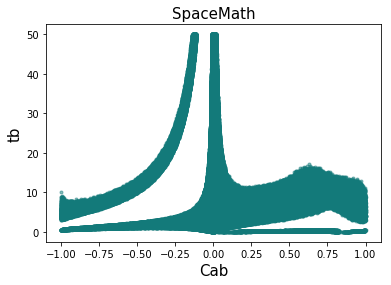

In [102]:
plot_df(THDMspace2['Rtau'],
        colx='Cab',
        coly='tb',
        #fname='rtau_space.png'
       )

### $$R_{b}$$

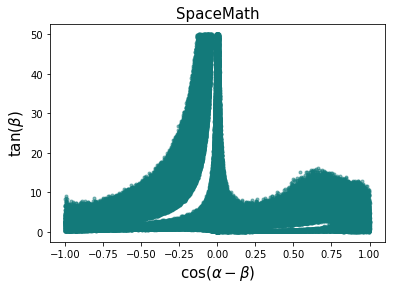

In [103]:
plot_df(THDMspace2['Rb'],colx='Cab',coly='tb',latex_names=latex_names)

### $$R_{\gamma}$$

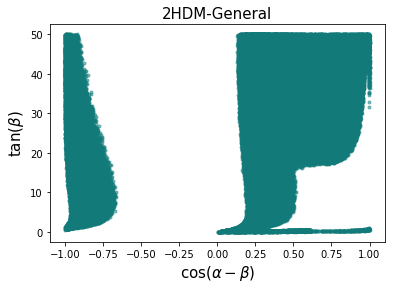

In [104]:
plot_df(THDMspace2['Rgamma'],colx='Cab',coly='tb',
        latex_names=latex_names,
       title='2HDM-General')

### $$R_{W}$$

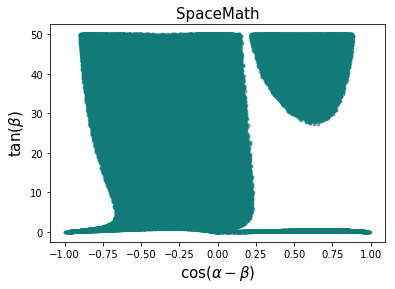

In [105]:
plot_df(THDMspace2['Rw'],colx='Cab',coly='tb',
        latex_names=latex_names)

### $$R_{Z}$$

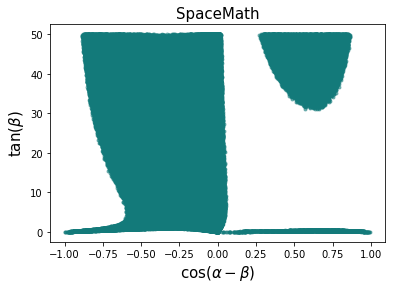

In [106]:
plot_df(THDMspace2['Rz'],colx='Cab',coly='tb',
        latex_names=latex_names)

## Intersection

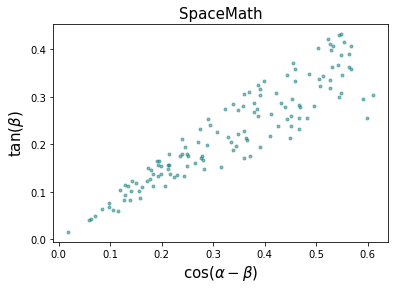

In [96]:
plot_df(THDMspace2['Intersection'],colx='Cab',coly='tb',
        latex_names=latex_names)

## All Rxs
Using directly matplotlib

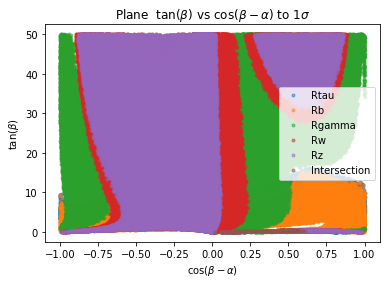

In [98]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsV = ['Rw','Rz','Rgamma']
data2s = {signal:THDMspace2[signal] for signal in signals}
plt.figure()
for k in data2s.keys():
    plt.plot(data2s[k]['Cab'],data2s[k]['tb'],'.',label=k,alpha=0.5)
plt.xlabel(r'$\cos(\beta-\alpha)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
plt.legend();

In [76]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

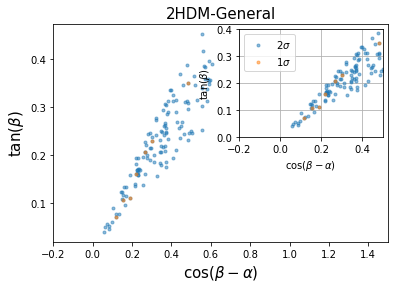

In [77]:
sigmaspace = {r'2$\sigma$':THDMspace2,r'1$\sigma$':THDMspace1}
fig, ax = plt.subplots(1, 1, figsize=[6, 4])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=1.5,xmin=-0.2)
#ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-General',fontsize=15)
ax.legend();


# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=0.4,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
#ax.title(r'Plane  $\tan(\beta)$ vs $\cos(\alpha -\beta)$')
axins.legend();
#path = '/home/moises/Dropbox/SpaceMathPackage/spacemathtex/Validation/'
#plt.savefig(path + 'THDMIII.pdf')
#plt.show()